# Drills - Basic Clustering

## DRILL: Mo' blobs, mo' problems?


by: Melissa N 

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 3 Blobs

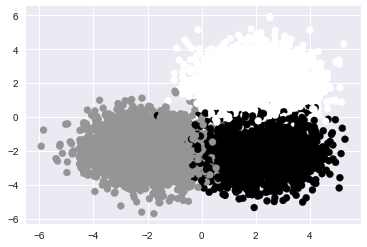

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-Means 

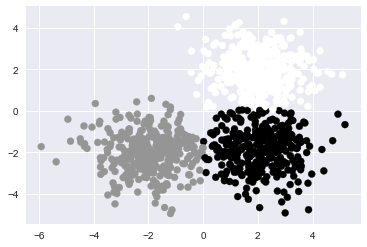

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      352    0   10
1        1  310    9
2        6    5  307


In [3]:
from sklearn.cluster import KMeans

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)



# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_train, y_pred))

Blobs are "fake" cluster in a sense   
rows ==> blobs    
Columns ==> Cluster    

The numbers off the diagonals  are missassign and can be seen as part of the intersection. 

### Mean-shift 

In [4]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


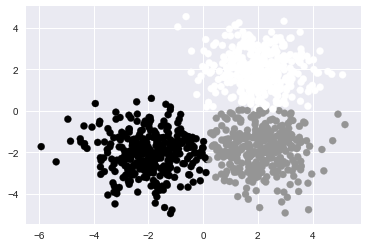

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Row 0 meaning   
352  ==> elements of blob 0 that ended up in cluster 0    
10   ==> elements of blob 0 that ended up on cluster 1 (10 were missassign)       
0    ==> element of blob 0 none ended up in cluster 2    


Blob is an assignemnt that doesn't change. 
Cluster is random. 

### Spectral Cluster

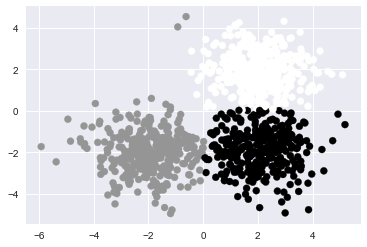

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      350    2   10
1        1  310    9
2        7    6  305


In [6]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

350 were in blob 0 and assigned to cluster 0     
10  in blob 0  and assigned to cluser 1       
2 in blob 0 and assigned to cluster 2        

### Affinity Propagation 

In [7]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

#Predicted clusters.
predict=af.fit_predict(X_train)

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 93


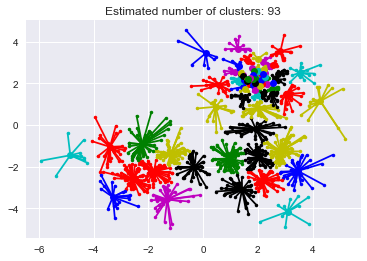

Comparing the assigned categories to the ones in the data:
col_0  0   1   2   3   4   5   6   7   8   9  ...  83  84  85  86  87  88  89  \
row_0                                         ...                               
0       1   1   2   1   6  11   8   0   3  22 ...   1   1   1  25   0   1   2   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   0   3   0  30   0   0 ...   0   0   0   0  11   0   0   

col_0  90  91  92  
row_0              
0       1   1   1  
1       0   0   0  
2       0   0   0  

[3 rows x 93 columns]


In [8]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

there is a potential to overfit b/c of too many clusters.  
We can still see the 3 blobs forming that is b/c we have made very good syntheic data.     

## 2 blobs

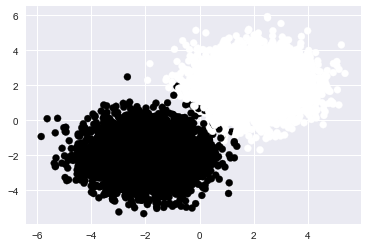

In [9]:


# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-Means 

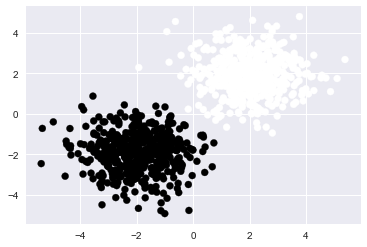

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      512    3
1        0  485


In [10]:


# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_train)



# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

512 ==> From blob 0 were assigned to cluster 0     
3   ==> From blob 0 were assigned to cluster 1 (3 are missassigned)

### Mean-shift 

In [11]:

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


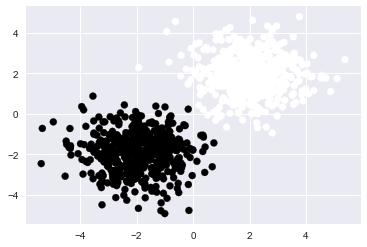

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        2  486


In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

2   ==> from blob 1 were assigned to cluster 0 (2 are missassigned)   
486 ==> from bol 1 were assigned to cluster 1 

### Spectral Cluster

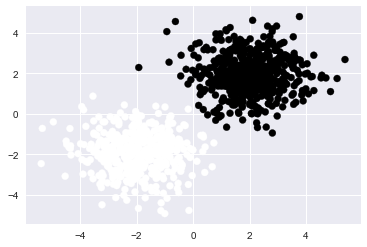

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        0  512
1      486    2


In [13]:
from sklearn.cluster import SpectralClustering

# We know we're looking for two clusters.
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

486 ==> from blob 1 were assigned to cluster 0   
2   ==> from blob 1 were assigned to cluster 1 (2 were missassigned)   
It looks like Blob 0 is actually cluster 1, while Blob 1 is actually cluster 0.    

### Affinity Propagation 

In [14]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

#Predicted clusters.
predict=af.fit_predict(X_train)

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 27


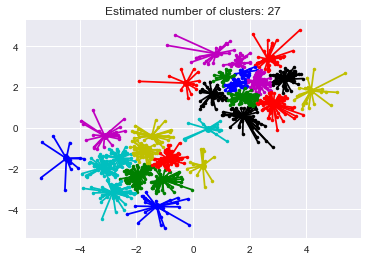

Comparing the assigned categories to the ones in the data:
col_0  0   1   2   3   4   5   6   7   8   9  ...  17  18  19  20  21  22  23  \
row_0                                         ...                               
0       0   0  37   0  19   0  34  17  23  13 ...   9  24   0  46  42  54  59   
1      14  83   0  49   0  28   0   0   0   0 ...   5   0  14   0   0   0   0   

col_0  24  25  26  
row_0              
0       0   0   0  
1      48  24  44  

[2 rows x 27 columns]


In [15]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

## 4 blobs

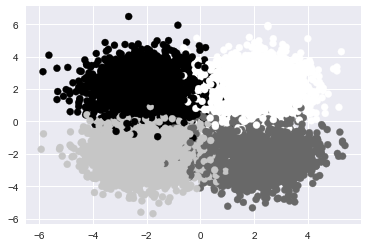

In [16]:

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-Means 

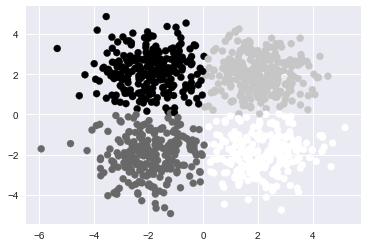

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        5    6  226    0
1      260    0    3    2
2        0  228    9    7
3        8    5    0  241


In [17]:


# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_train)



# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

### Mean-shift 

In [18]:

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


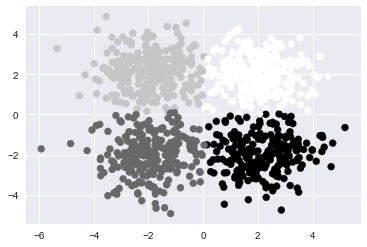

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0


In [19]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

### Spectral Cluster

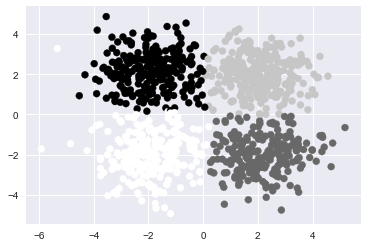

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0  262    3    8
1      228    0    6    5
2       11    3  223    1
3       10    2    0  238


In [20]:
from sklearn.cluster import SpectralClustering

# We know we're looking for four clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

### Affinity Propagation 

In [21]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

#Predicted clusters.
predict=af.fit_predict(X_train)

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 25


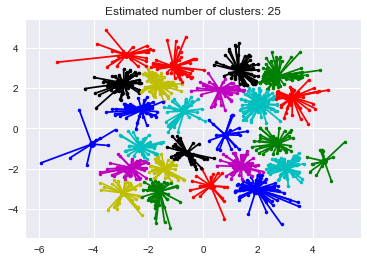

Comparing the assigned categories to the ones in the data:
col_0  0   1   2   3   4   5   6   7   8   9  ...  15  16  17  18  19  20  21  \
row_0                                         ...                               
0       8  60   0   1  36   0   0   0   4  37 ...   0   4   0   0   0   0   0   
1       0   0  12   6   0  39   0   0   0   0 ...   0   0   0   2  28  26   1   
2      11   0   7   1   0   1   0  58  29   1 ...  13   0  57  49   0  10   0   
3       0   0   0  19   3   0  57   0   0   0 ...   0  39   0   0   0   3  40   

col_0  22  23  24  
row_0              
0       0   0  67  
1      38   0   0  
2       0   0   1  
3       0  24   0  

[4 rows x 25 columns]


In [22]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

## 6 Blobs

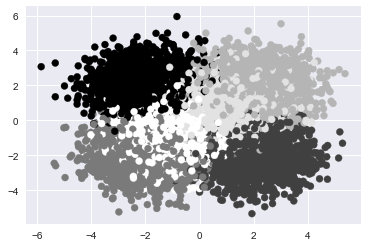

In [23]:


# The coordinates of the centers of our blobs.
centers = [[-1, -1] ,[1, 1],[2, 2], [-2, -2], [2, -2],[-2, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-Means 

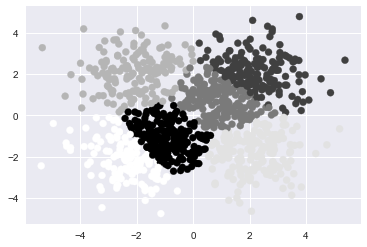

Comparing k-means clusters against the data:
col_0    0    1    2    3    4    5
row_0                              
0       27    0    0  113    0    0
1        8    8    3    1  147    0
2        8    8    4    2    0  139
3       12  114   30    0   11    6
4        0   47  114    0    1    1
5      121    9    0   53    6    7


In [24]:
from sklearn.cluster import KMeans

# Calculate predicted values.
y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(X_train)



# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

### Mean-shift 

In [25]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


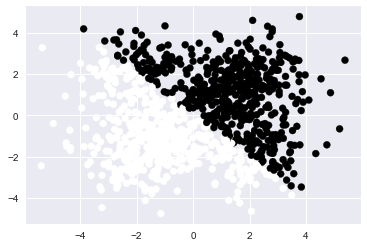

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      166   10
1       16  170
2        0  151
3      169    0
4       72   93
5       77   76


In [26]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

### Spectral Cluster

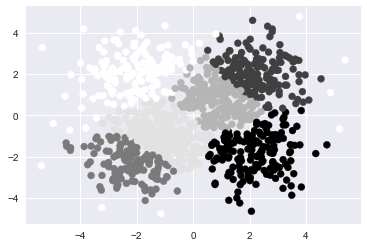

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5
row_0                              
0        5  127   12   24    0    8
1        7   10  114    0   45   10
2        9    0   28    0  111    3
3        8   53    0  107    0    1
4        1    6    9    0    1  148
5      137    8    7    0    1    0


In [27]:
from sklearn.cluster import SpectralClustering

# We know we're looking for six clusters.
n_clusters=6

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

### Affinity Propagation 

In [28]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

#Predicted clusters.
predict=af.fit_predict(X_train)

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 33


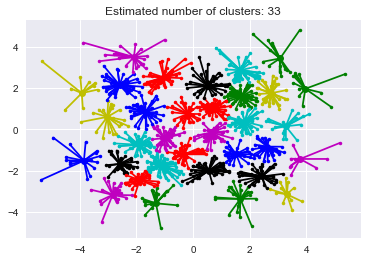

Comparing the assigned categories to the ones in the data:
col_0  0   1   2   3   4   5   6   7   8   9  ...  23  24  25  26  27  28  29  \
row_0                                         ...                               
0       3   0   1   0   1   0   6   1   0  25 ...   7  29   0   0  12   0   0   
1       7  23  35   5   0   0   0   0   0   3 ...   0   0   0   0   1   0   0   
2       0  28   7   5   0   0   0   0   0   0 ...   0   0   0   0   0   1  15   
3       0   0   0   0  21   0  25  16   0  10 ...  24  11   0   0   7   0   0   
4      23   0   1   8   0  12   0   0  21   2 ...   0   0  10   0  17   0   0   
5       0   0   1   0   0   0   0   0   0   1 ...   0   0   0  10   0  38   0   

col_0  30  31  32  
row_0              
0       6   0   0  
1      17   8   2  
2       0  30   0  
3       0   0   0  
4       0   0   0  
5       5   1  19  

[6 rows x 33 columns]


In [29]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [30]:
## do crosstab for ap.